<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/transfer_learning_with_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [17]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [20]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [21]:
conv_base.trainable=True
set_trainable = False

for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.set_trainable= True
  else :
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [23]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
train_df = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

validation_df = keras.utils.image_dataset_from_directory(
    '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
def process(image,labels):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,labels


train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [26]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-5),metrics='accuracy')

In [27]:
history= model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
625/625 [==============================] - 76s 120ms/step - loss: 0.7182 - accuracy: 0.7846 - val_loss: 0.1896 - val_accuracy: 0.9304
Epoch 2/10
625/625 [==============================] - 75s 119ms/step - loss: 0.1899 - accuracy: 0.9258 - val_loss: 0.3457 - val_accuracy: 0.9162
Epoch 3/10
625/625 [==============================] - 74s 119ms/step - loss: 0.1386 - accuracy: 0.9470 - val_loss: 0.2651 - val_accuracy: 0.9448
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1112 - accuracy: 0.9611 - val_loss: 0.1771 - val_accuracy: 0.9498
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0834 - accuracy: 0.9725 - val_loss: 0.1969 - val_accuracy: 0.9480
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0629 - accuracy: 0.9801 - val_loss: 0.2434 - val_accuracy: 0.9466
Epoch 7/10
625/625 [==============================] - 74s 119ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.5271 - val_ac

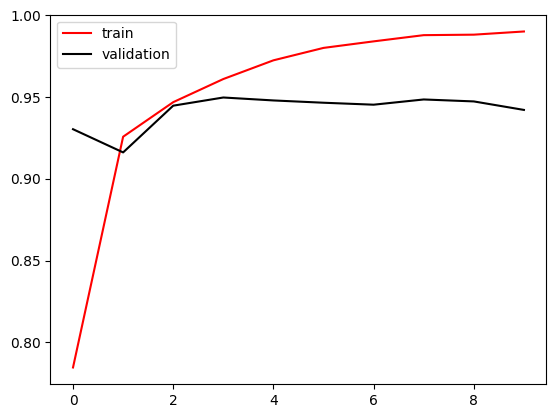

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()